In [1]:
from alpaca import Telescope, Camera, FilterWheel
from ciboulette.base import ciboulettepy as Cbl
from ciboulette.sector import sectorpy as Sct

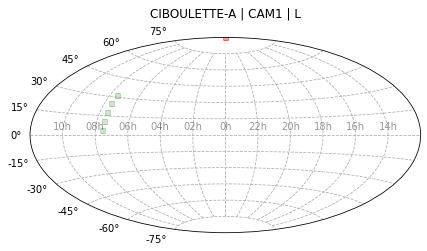

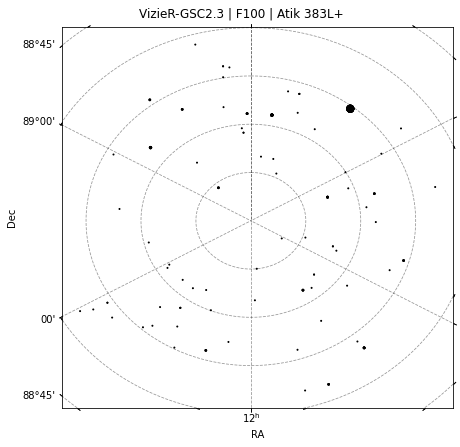

KeyboardInterrupt: 

In [7]:
# Initialisation Ciboulette
cbl = Cbl.Ciboulette()

# Changement de focale pour Ciboulette B
cbl.focale = 85.0

# Initialisation Sector Archives
sct = Sct.Sector()
sector_arch = sct.readarchives(cbl.archive_table)

# Initialisation FilterWheel
# Changement de device pour le ccd remise en l'état
ccd = Camera(cbl.serveur, cbl.device)

# Initialisation Telescope
# Changement de device pour le telescope simulator
cbl.device = 0
telescope = Telescope(cbl.serveur, cbl.device)
telescope.sitelatitude(cbl.site_lat)
telescope.sitelongitude(cbl.site_long)
telescope.unpark()
telescope.tracking(True)
telescope.synctocoordinates(cbl.ra,cbl.dec)

# Initialisation FilterWheel
# Changement de device pour le filterwheel remise en l'état
filterwheel = FilterWheel(cbl.serveur, cbl.device)
filter_names = filterwheel.names()
filterwheel.position(0)

for i in range(0,100000):
    
    clear_output(wait=True)

    cbl.ra = telescope.rightascension()
    cbl.dec = telescope.declination()   
    cbl.filter = filter_names[filterwheel.position()]

    cbl.projections(sector_arch)
    cbl.starmap()
    time.sleep(30)